# Forecasting Several Time Steps Ahead
- RNN으로 여러개를 예측하기 (loop_forward)

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

import time
import myplot

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model

C:\Users\admin\Anaconda3\envs\tf2.5\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\admin\Anaconda3\envs\tf2.5\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\admin\Anaconda3\envs\tf2.5\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


python 3.8.0 (default, Nov  6 2019, 16:00:02) [MSC v.1916 64 bit (AMD64)]
matplotlib 3.4.2
numpy 1.19.5
pandas 1.3.2
sklearn 0.24.2
tensorflow 2.5.0
tensorflow.keras 2.5.0


## Forecasting Several Steps Ahead

In [2]:
def generate_time_series(batch_size, n_steps):        
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    
    time = np.linspace(0, 1, n_steps)    
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2    
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise    
    return series[..., np.newaxis].astype(np.float32)

## Single step: series = generate_time_series(1000, n_steps + 1)

In [3]:
np.random.seed(43) 
n_steps = 50

series = generate_time_series(1, n_steps + 10)

X_train, Y_train = series[:700, :n_steps], series[:700, -10:, 0]
X_valid, Y_valid = series[700:900, :n_steps], series[700:900, -10:, 0]
X_test, Y_test = series[900:, :n_steps], series[900:, -10:, 0]

## b1. Linear Model + LF
### Look_Forward = 10 Steps Ahead

In [4]:
np.random.seed(42)
tf.random.set_seed(42)

flatten_LF = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(10)
])

model = flatten_LF

model.compile(loss="mse", optimizer="adam")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                510       
Total params: 510
Trainable params: 510
Non-trainable params: 0
_________________________________________________________________


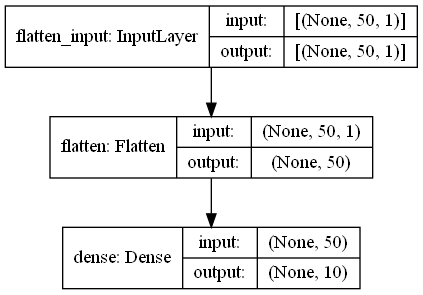

In [5]:
plot_model(model, to_file='./b1_model_FlattenLF.png', show_shapes=True)

In [6]:
%%time
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
1/1 [==============================] - 1s 962ms/step - loss: 0.6135
Epoch 2/20
1/1 [==============================] - 0s 23ms/step - loss: 0.5923
Epoch 3/20
1/1 [==============================] - 0s 20ms/step - loss: 0.5715
Epoch 4/20
1/1 [==============================] - 0s 20ms/step - loss: 0.5513
Epoch 5/20
1/1 [==============================] - 0s 25ms/step - loss: 0.5316
Epoch 6/20
1/1 [==============================] - 0s 21ms/step - loss: 0.5124
Epoch 7/20
1/1 [==============================] - 0s 20ms/step - loss: 0.4938
Epoch 8/20
1/1 [==============================] - 0s 21ms/step - loss: 0.4758
Epoch 9/20
1/1 [==============================] - 0s 20ms/step - loss: 0.4583
Epoch 10/20
1/1 [==============================] - 0s 127ms/step - loss: 0.4413
Epoch 11/20
1/1 [==============================] - 0s 23ms/step - loss: 0.4249
Epoch 12/20
1/1 [==============================] - 0s 26ms/step - loss: 0.4090
Epoch 13/20
1/1 [==============================] - 0s 23ms/

In [7]:
#myplot.plot_learning_curves(history.history["loss"], history.history["val_loss"])
#plt.show()

In [8]:
b1 = history.history['loss'][np.argmin(history.history['loss'])]
print('The loss of Linear Model (#10 steps):', b1)

The loss of Linear Model (#10 steps): 0.3002740442752838


## b2. simpleRNN + LF
- 10 Steps Ahead that predicts all 10 next values at once

In [9]:
simpleRNNLF = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
])

model = simpleRNNLF
model.compile(loss="mse", optimizer="adam")
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, None, 20)          440       
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 20)                820       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
Total params: 1,470
Trainable params: 1,470
Non-trainable params: 0
_________________________________________________________________


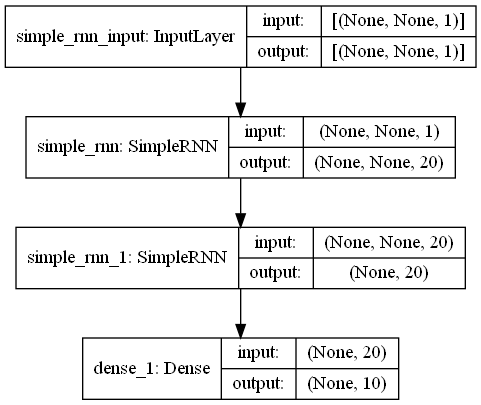

In [10]:
plot_model(model, to_file='./b2_model_FlattenLF.png', show_shapes=True)

In [11]:
%%time
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 0.2232
Epoch 2/20
1/1 [==============================] - 0s 334ms/step - loss: 0.1615
Epoch 3/20
1/1 [==============================] - 0s 304ms/step - loss: 0.1177
Epoch 4/20
1/1 [==============================] - 0s 287ms/step - loss: 0.0869
Epoch 5/20
1/1 [==============================] - 0s 278ms/step - loss: 0.0628
Epoch 6/20
1/1 [==============================] - 0s 276ms/step - loss: 0.0430
Epoch 7/20
1/1 [==============================] - 0s 288ms/step - loss: 0.0297
Epoch 8/20
1/1 [==============================] - 0s 298ms/step - loss: 0.0244
Epoch 9/20
1/1 [==============================] - 0s 290ms/step - loss: 0.0233
Epoch 10/20
1/1 [==============================] - 0s 309ms/step - loss: 0.0208
Epoch 11/20
1/1 [==============================] - 0s 250ms/step - loss: 0.0159
Epoch 12/20
1/1 [==============================] - 0s 254ms/step - loss: 0.0111
Epoch 13/20
1/1 [==============================] - 0

In [12]:
np.random.seed(43)

series = myplot.generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
Y_pred = model.predict(X_new)[..., np.newaxis]

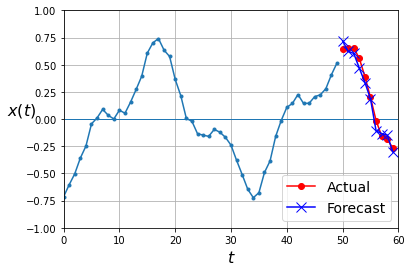

In [13]:
myplot.plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [14]:
b2 = history.history['loss'][np.argmin(history.history['loss'])]
print('The loss of Simple RNN (#10 steps):', b2)

The loss of Simple RNN (#10 steps): 0.0027729107532650232


# Results Summary

In [15]:
models = pd.DataFrame({
    'Model': ['LinearModel_LF','simpleRNN+LF'],
    'Score': [b1, b2]})
models.sort_values(by='Score', ascending=True)

Model     Score
1    simpleRNN+LF  0.002773
0  LinearModel_LF  0.300274